Most of this is thanks to Matt Bonnema.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pystac_client import Client  
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from pystac_client import ItemSearch
from shapely.geometry import box

# Search HLS Imagery

A lot of good information is [here](https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials/02_Data_Discovery_CMR-STAC_API.html)

In [3]:
# ItemSearch??

In [4]:
start_date = datetime(2022, 1, 1)
stop_date = datetime(2022, 2, 1)
aoi = box(-121, 37, -120, 38)
aoi.__geo_interface__

{'type': 'Polygon',
 'coordinates': (((-120.0, 37.0),
   (-120.0, 38.0),
   (-121.0, 38.0),
   (-121.0, 37.0),
   (-120.0, 37.0)),)}

In [5]:
aoi.bounds

(-121.0, 37.0, -120.0, 38.0)

In [6]:
STAC_URL = 'https://cmr.earthdata.nasa.gov/stac'
api = Client.open(f'{STAC_URL}/LPCLOUD/')
hls_collections = ['HLSL30.v2.0', 'HLSS30.v2.0']

search_params = {"collections": hls_collections,
                 "bbox": aoi.bounds,
                 "datetime": [start_date, stop_date],
                 "max_items": 100}
search_hls = api.search(**search_params)
search_hls

In [7]:
hls_collection = search_hls.get_all_items()
hls_collection

In [8]:
search_hls.matched()

142

In [9]:
d = list(hls_collection)
d[0].to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': 'HLS.S30.T11SKC.2022001T184801.v2.0',
 'properties': {'datetime': '2022-01-01T18:53:52.823000Z',
  'start_datetime': '2022-01-01T18:53:52.823Z',
  'end_datetime': '2022-01-01T18:53:52.823Z',
  'eo:cloud_cover': 28},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-120.4079147, 37.8101079],
    [-119.1617522, 37.8395955],
    [-119.1913473, 38.8284398],
    [-120.454503, 38.7978947],
    [-120.4079147, 37.8101079]]]},
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0/items/HLS.S30.T11SKC.2022001T184801.v2.0'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v2.0'},
  {'rel': <RelType.ROOT: 'root'>,
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/',
   'type': <MediaType.JSON: 'application/json'>,
   'title': 'LPCLO

# Read the data

In [10]:
from osgeo import gdal
import rasterio

In [11]:
url_sample = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T11SKC.2022001T184801.v2.0/HLS.S30.T11SKC.2022001T184801.v2.0.B07.tif'

First, make sure you have logged into Earthdata Login (it will store cookies in `~/cookies.txt`. Below, I copied from [this link](https://lpdaac.usgs.gov/resources/e-learning/getting-started-cloud-native-hls-data-python/) in section 4. It seems to work.

In [12]:
# GDAL configs used to successfully access LP DAAC Cloud Assets via vsicurl 
gdal.SetConfigOption("GDAL_HTTP_UNSAFESSL", "YES")
gdal.SetConfigOption('GDAL_HTTP_COOKIEFILE','~/cookies.txt')
gdal.SetConfigOption('GDAL_HTTP_COOKIEJAR', '~/cookies.txt')
gdal.SetConfigOption('GDAL_DISABLE_READDIR_ON_OPEN','YES')
gdal.SetConfigOption('GDAL_DISABLE_READDIR_ON_OPEN','FALSE')
gdal.SetConfigOption('CPL_VSIL_CURL_ALLOWED_EXTENSIONS','TIF')

In [13]:
with rasterio.open(url_sample) as ds:
    p = ds.profile
    X = ds.read(1)

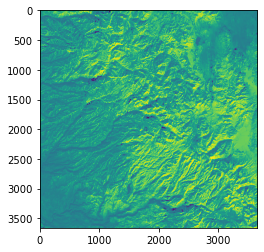

In [14]:
plt.imshow(X)